In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def degreedist(G: nx.Graph, logs=False):
    degrees = dict(G.degree()).values()
    plt.hist(degrees, bins=30, log=logs, edgecolor="black")
    plt.xlabel("Sum of weight of adjacent nodes")
    plt.ylabel("Number of nodes")
    if logs:
        plt.xscale('log')
    plt.show()

# Data processed with customers as nodes and shared items as edges

In [35]:
dataset = pd.read_csv('./processed_customer_grocery_dataset.csv')

In [36]:
G: nx.Graph = nx.from_pandas_edgelist(dataset, 'source', 'dest', 'weight')

In [37]:
print(len(G.nodes))
print(len(G.edges))

3898
5397795


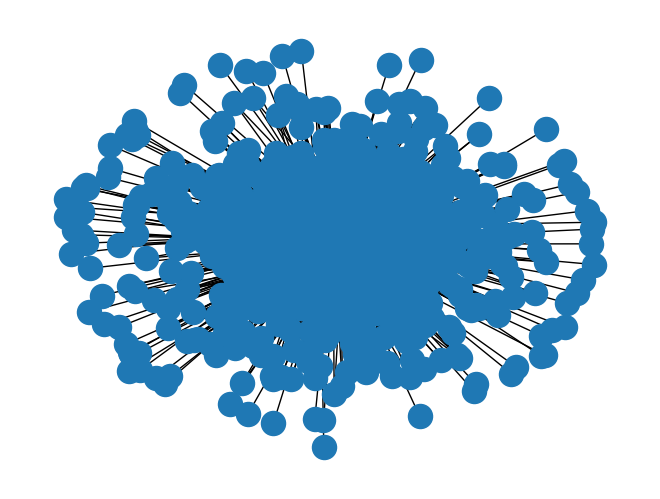

In [40]:
nx.draw(G)

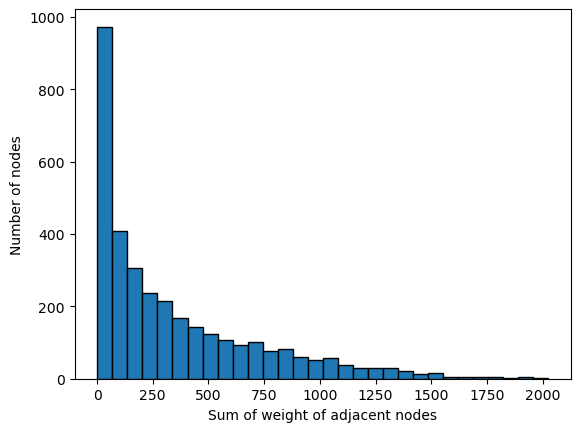

In [41]:
degreedist(G)

In [42]:
communities = nx.community.greedy_modularity_communities(G, 'weight')

In [43]:
print(len(communities))

3


In [44]:
pos = nx.spring_layout(G, weight='weight')

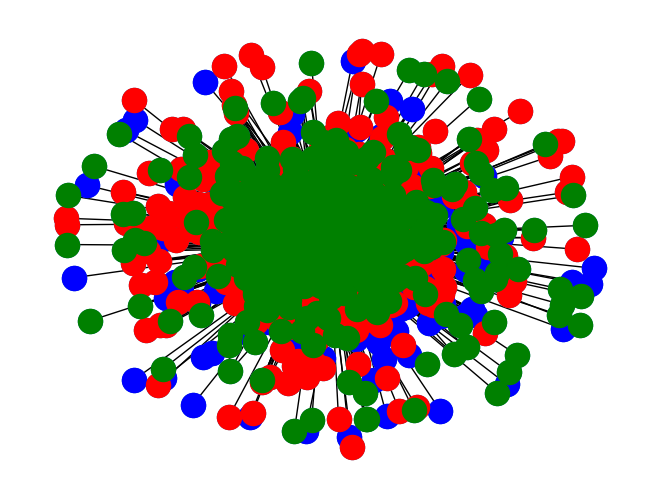

In [45]:
nx.draw(G, pos)
nx.draw_networkx_nodes(G, pos, nodelist=communities[0], node_color='b')
nx.draw_networkx_nodes(G, pos, nodelist=communities[1], node_color='r')
nx.draw_networkx_nodes(G, pos, nodelist=communities[2], node_color='g')

# Data processed with items as nodes and the shared customer as edges

In [38]:
item_dataset = pd.read_csv('./processed_item_grocery_dataset.csv')

In [39]:
G_i: nx.Graph = nx.from_pandas_edgelist(item_dataset, 'source', 'dest', 'weight')

In [40]:
print(len(G_i.nodes))
print(len(G_i.edges))

167
9824


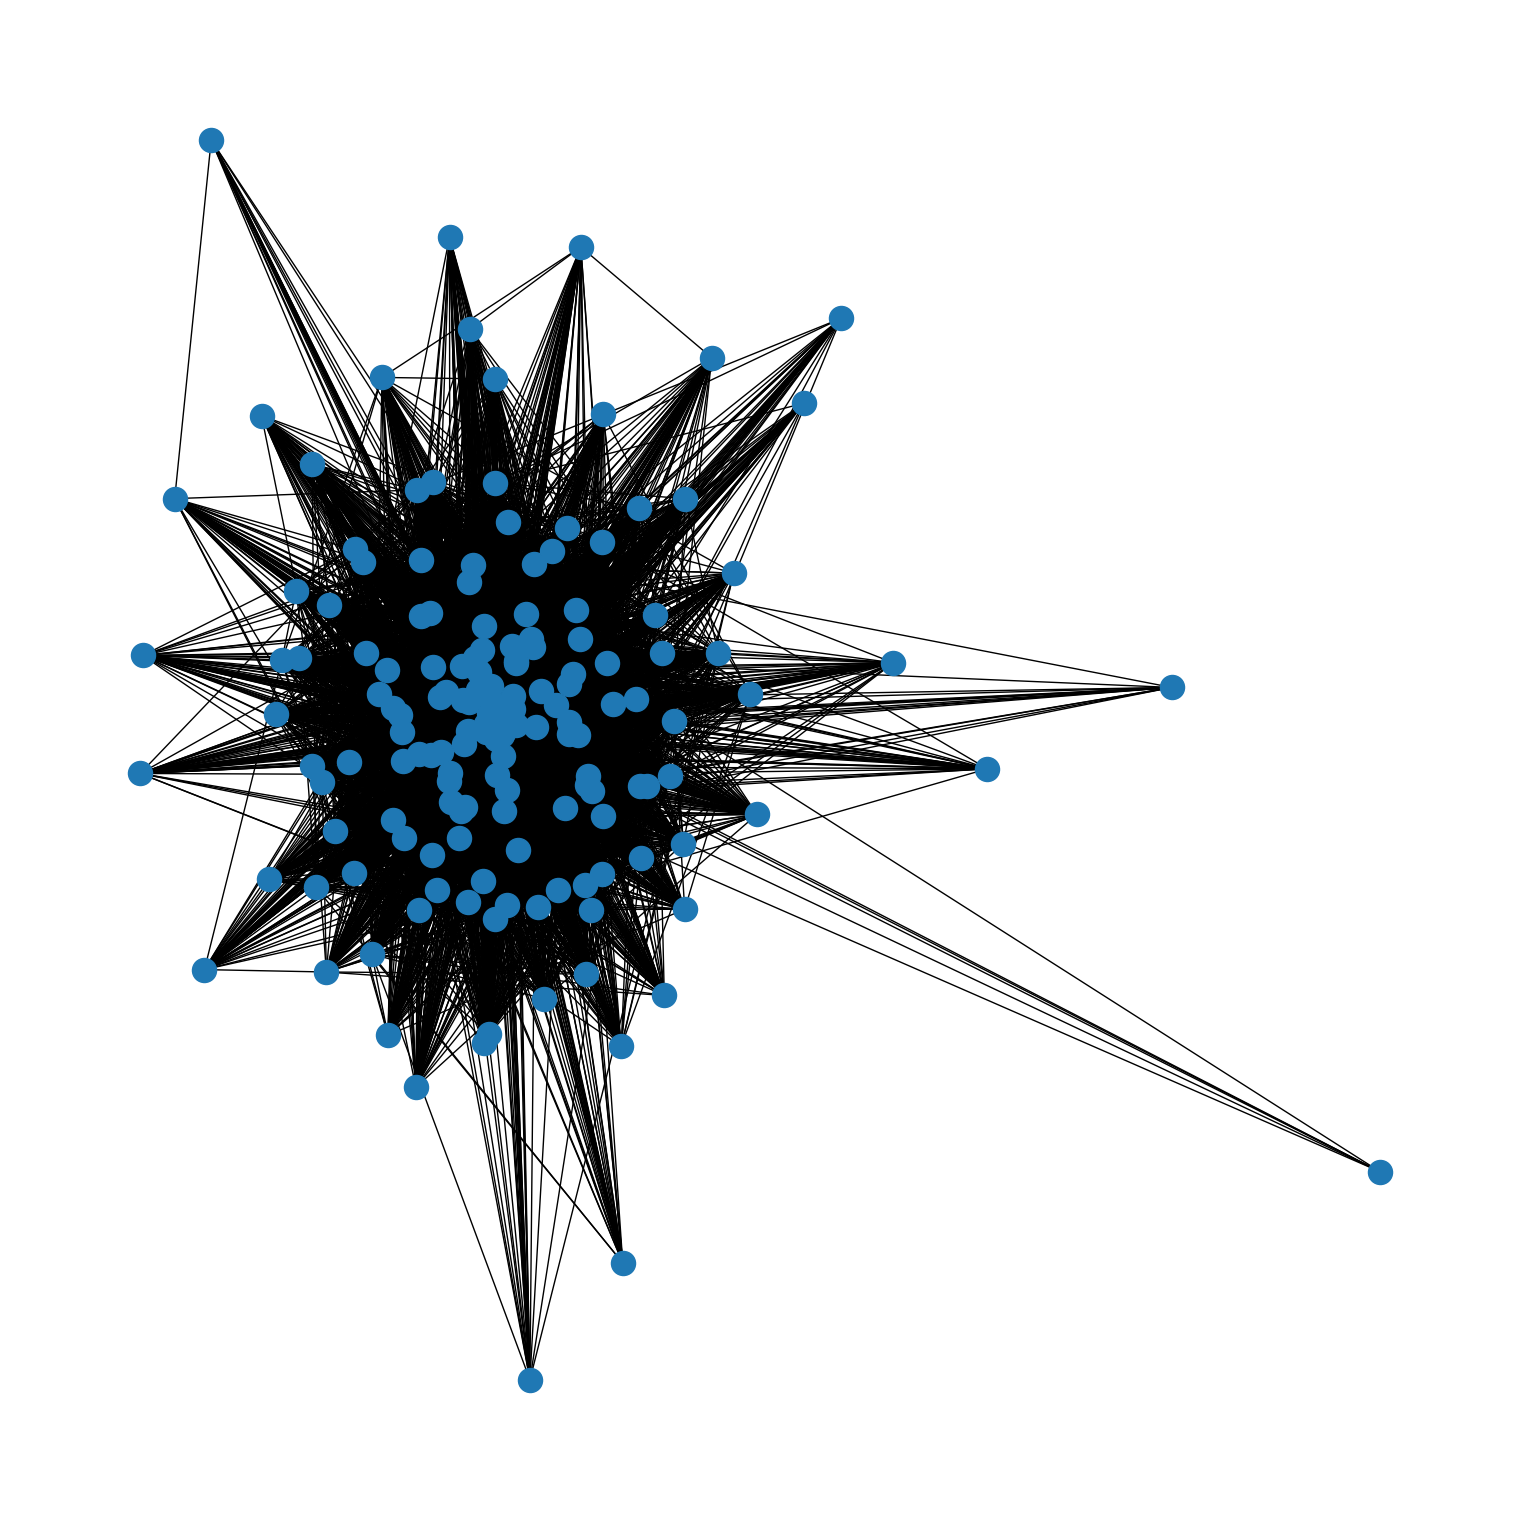

In [42]:
plt.figure(figsize=(15, 15))
nx.draw(G_i)

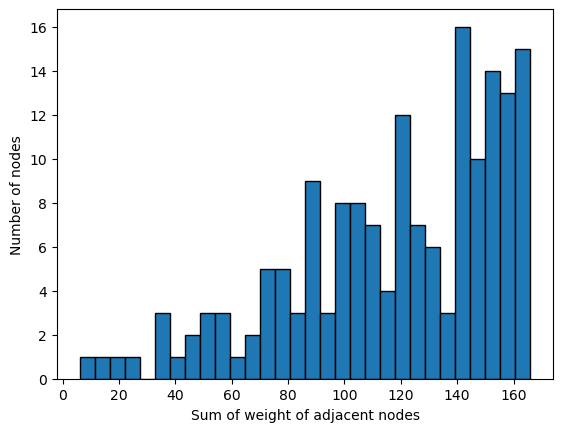

In [43]:
degreedist(G_i)

In [44]:
communities_i = nx.community.greedy_modularity_communities(G_i, 'weight')

In [45]:
print(len(communities_i))
print(nx.community.modularity(G_i, communities_i))

3
0.004117720689952605


In [46]:
pos_i = nx.spring_layout(G_i, weight='weight')

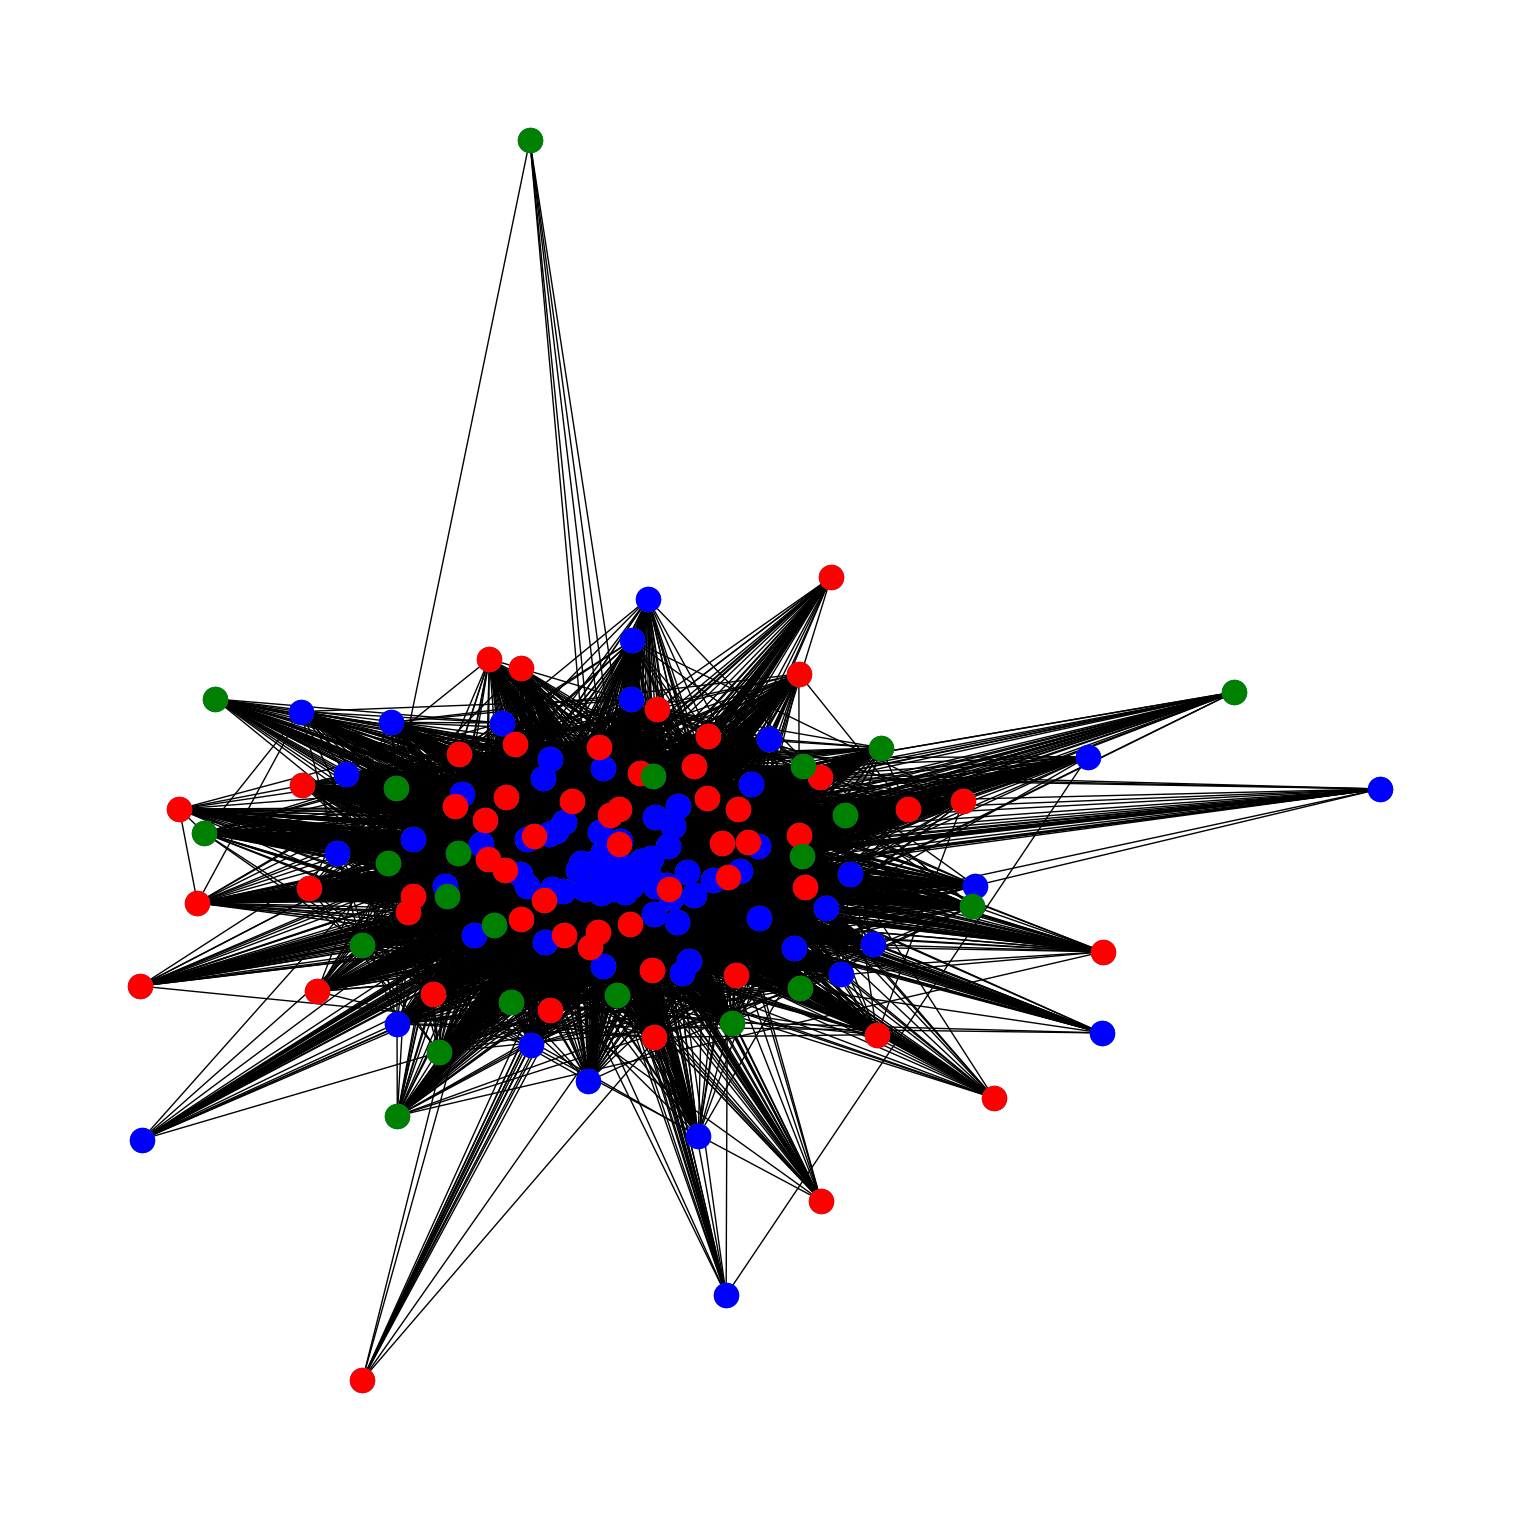

In [47]:
plt.figure(figsize=(15, 15))
nx.draw(G_i, pos_i)
nx.draw_networkx_nodes(G_i, pos_i, nodelist=communities_i[0], node_color='b')
nx.draw_networkx_nodes(G_i, pos_i, nodelist=communities_i[1], node_color='r')
nx.draw_networkx_nodes(G_i, pos_i, nodelist=communities_i[2], node_color='g')


# Nodes are item and edge if items were bought on same day

In [4]:
data_item_dataset = pd.read_csv('./processed_data_items_grocery_dataset.csv')

In [5]:
data_item_graph = nx.from_pandas_edgelist(data_item_dataset, 'source', 'dest', 'weight')

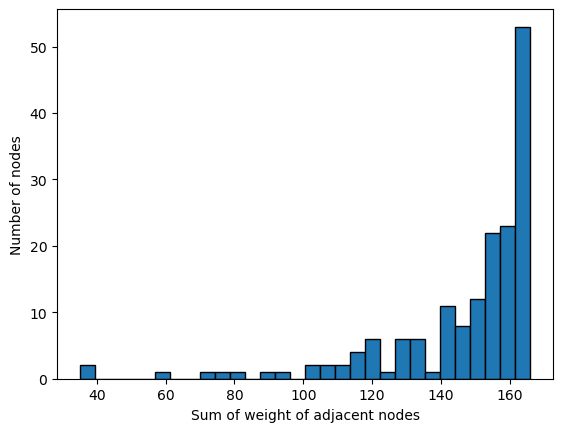

In [6]:
degreedist(data_item_graph)

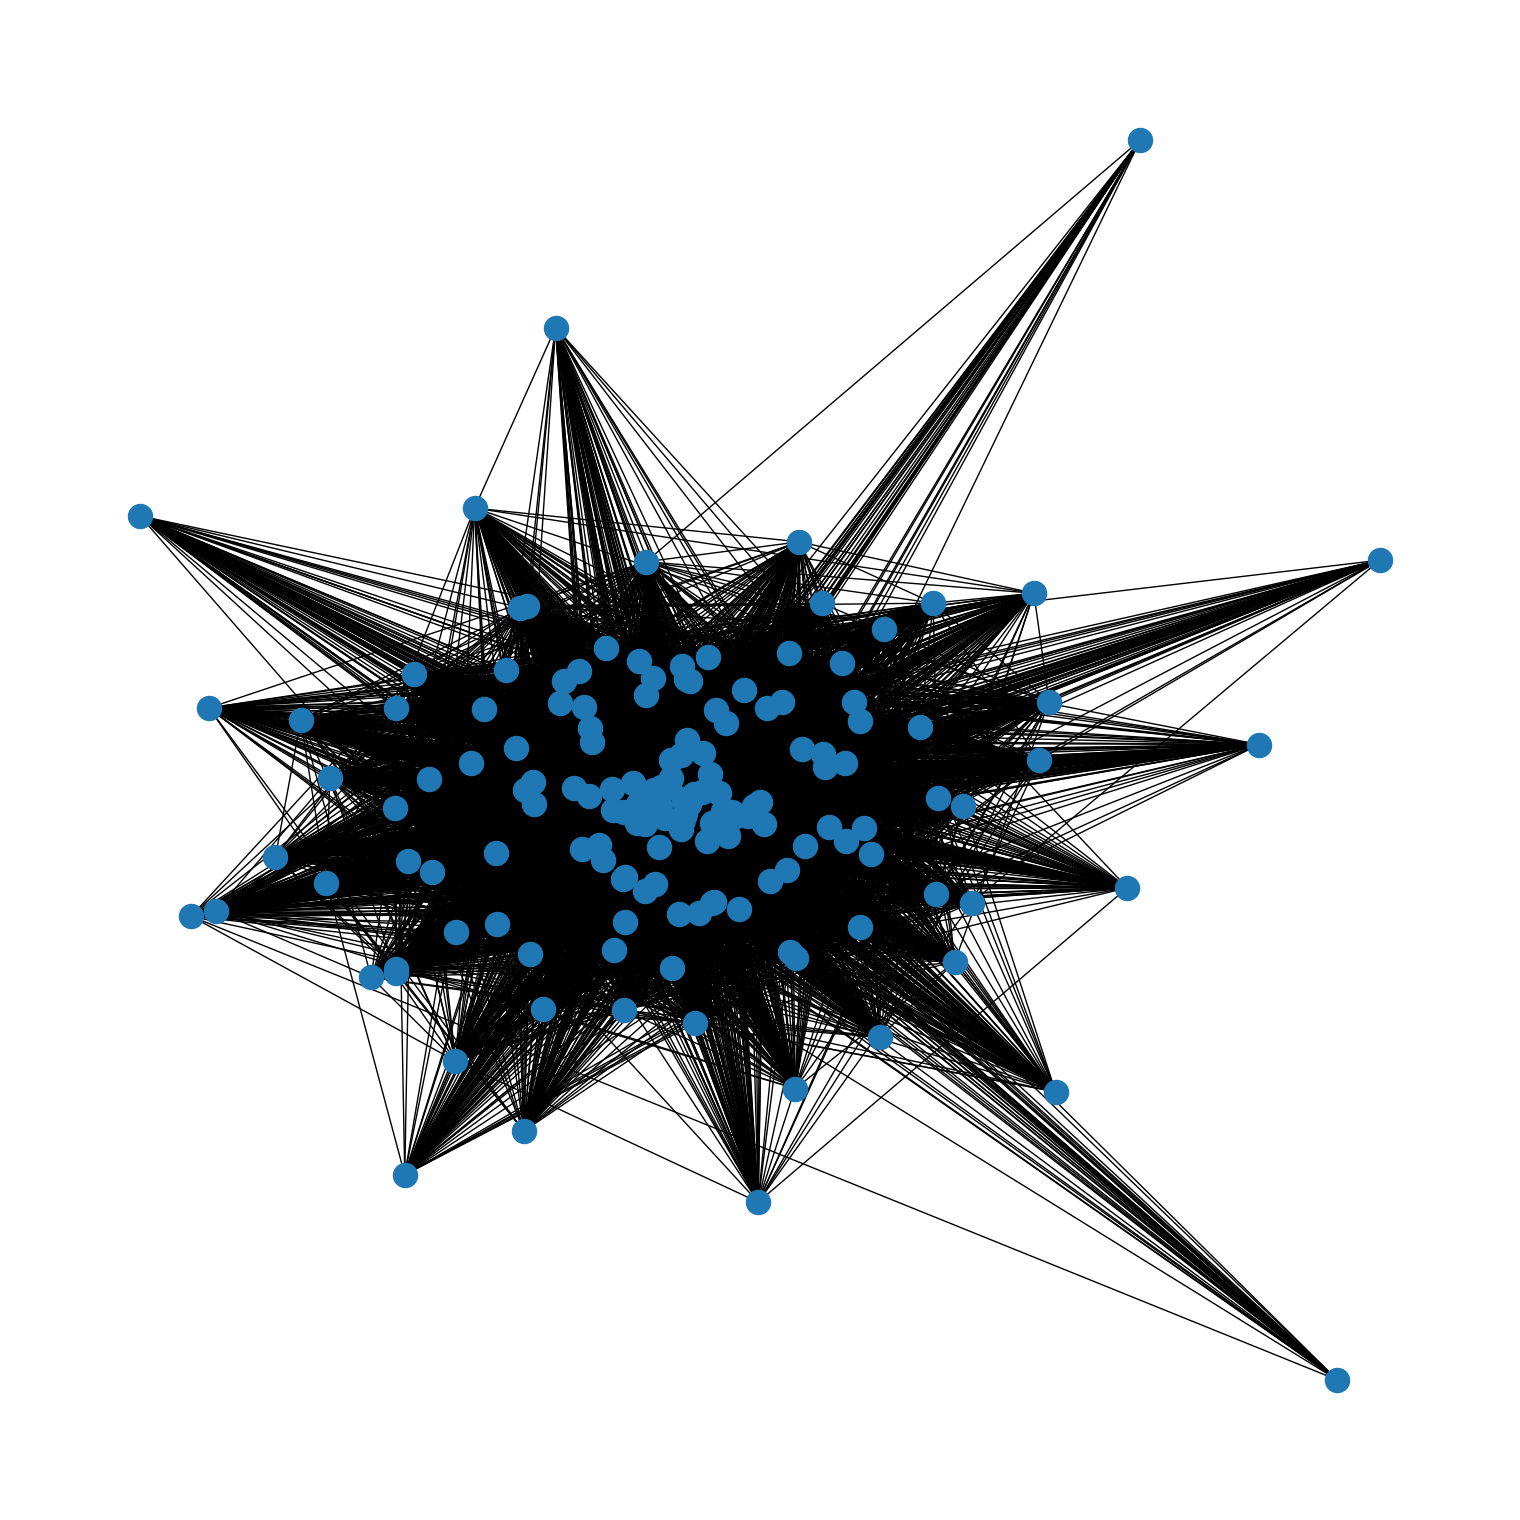

In [48]:
plt.figure(figsize=(15, 15))
nx.draw(data_item_graph)

In [8]:
date_item_communities = nx.community.greedy_modularity_communities(data_item_graph)

In [49]:
pos_di = nx.spring_layout(data_item_graph)

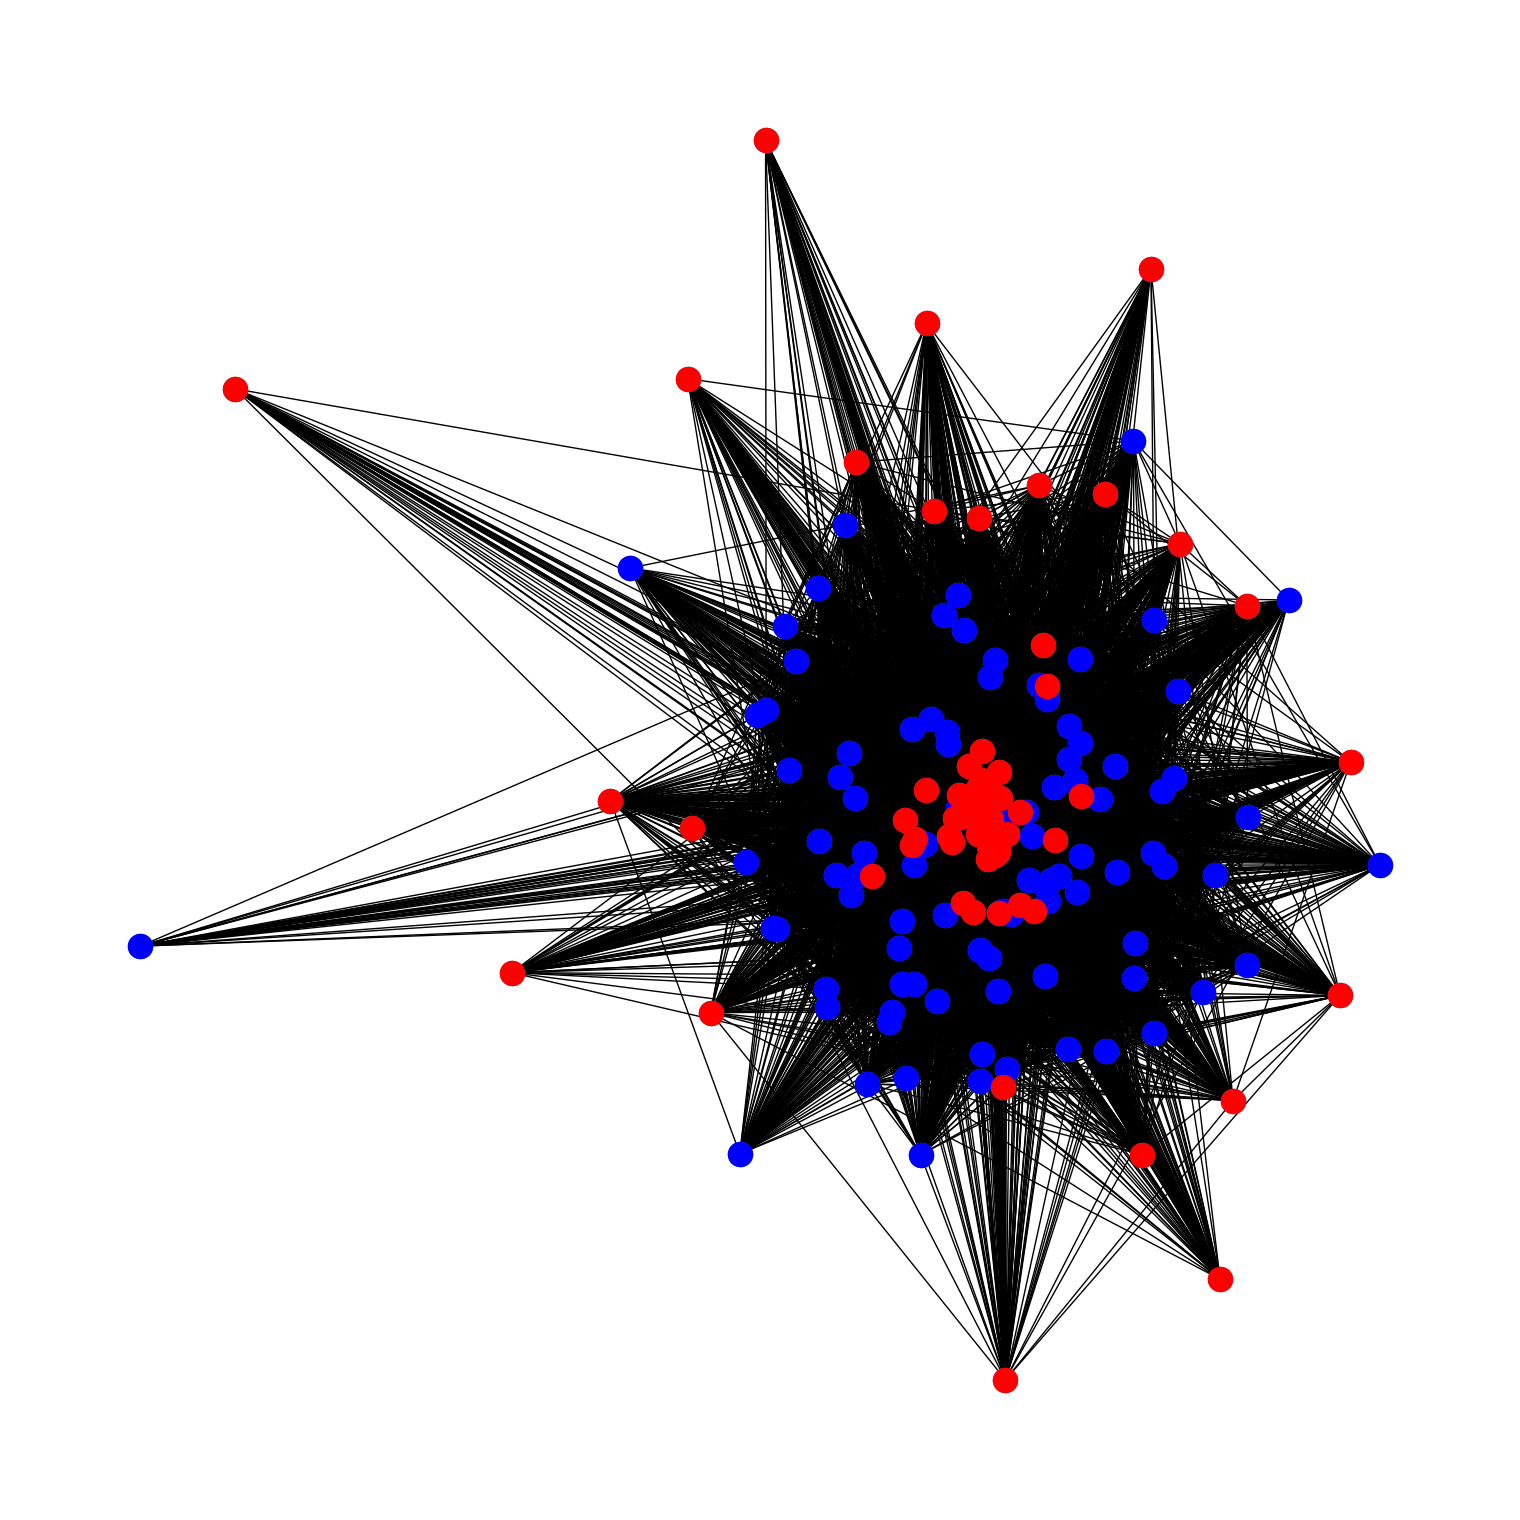

In [51]:
plt.figure(figsize=(15, 15))  # Set the size of the plot
nx.draw(data_item_graph, pos_di)
nx.draw_networkx_nodes(data_item_graph, pos_di, nodelist=date_item_communities[0], node_color='b')
nx.draw_networkx_nodes(data_item_graph, pos_di, nodelist=date_item_communities[1], node_color='r')


# Network with customer as nodes and edge if the same item was bought on the same day (edges of weight 1 removed)

In [17]:
cust_date_item_dataset = pd.read_csv('./processed_cust_date_items_grocery_dataset.csv')

In [18]:
cust_date_item_graph: nx.Graph = nx.from_pandas_edgelist(cust_date_item_dataset, 'source', 'dest', 'weight')

In [52]:
pos_cdi = nx.spring_layout(cust_date_item_graph)

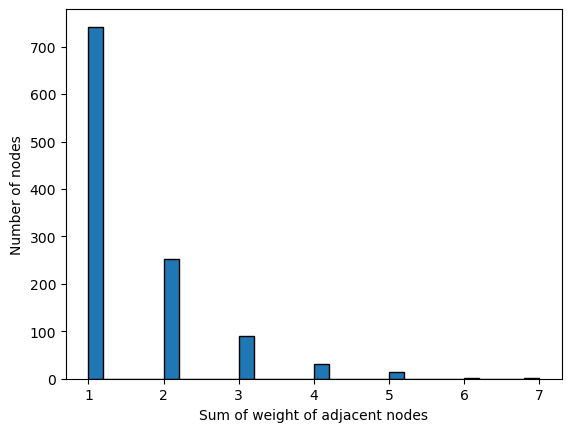

In [56]:
degreedist(cust_date_item_graph)

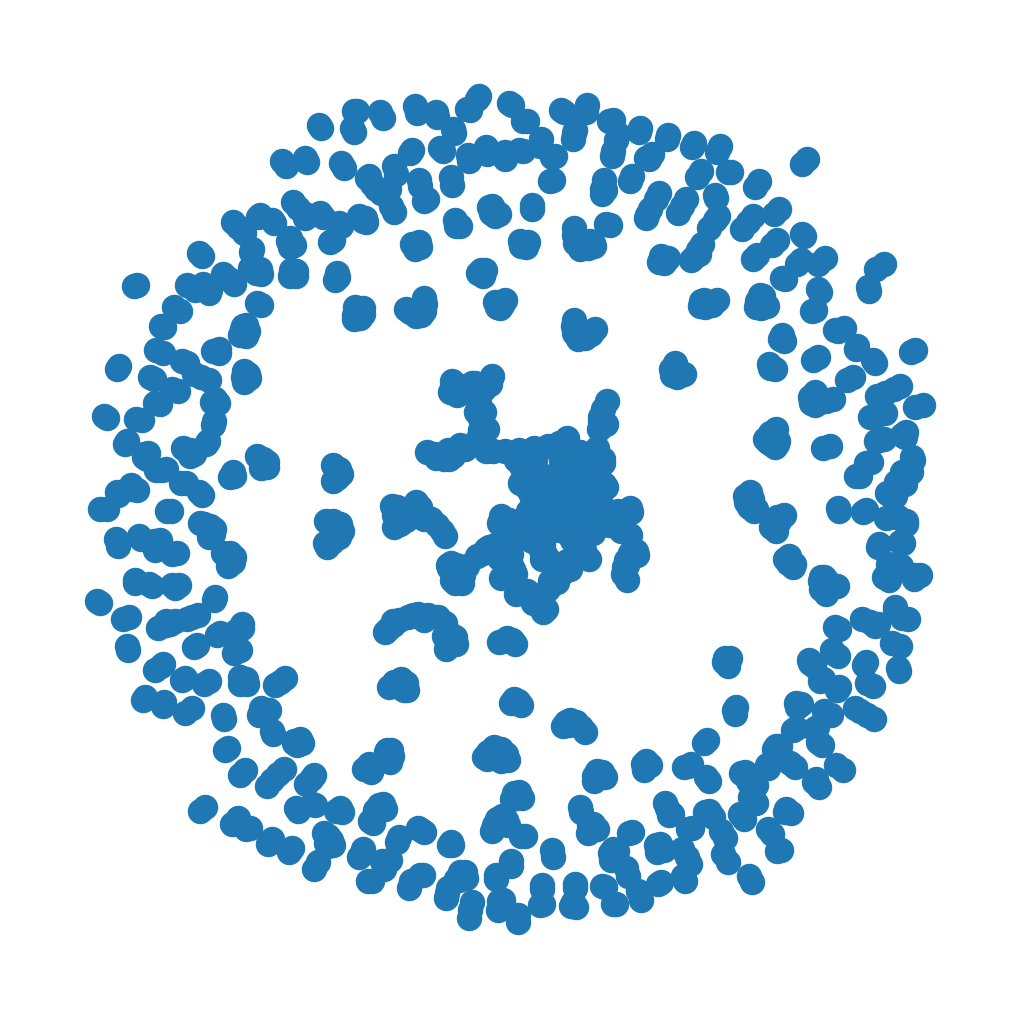

In [53]:
plt.figure(figsize=(10, 10))
nx.draw(cust_date_item_graph, pos_cdi)

In [24]:
cdi_communities = nx.community.greedy_modularity_communities(cust_date_item_graph, 'weigth')

In [26]:
print(len(cdi_communities))
print(nx.community.modularity(cust_date_item_graph, cdi_communities))

319
0.9883683930957358


In [93]:
print(len(cust_date_item_graph.edges))
print(len(cust_date_item_graph.nodes))

865
1132


In [28]:
node_color = []
for node in cust_date_item_graph:
    for i in range(len(cdi_communities)):
        if node in cdi_communities[i]:
            node_color.append(i*100)
            break

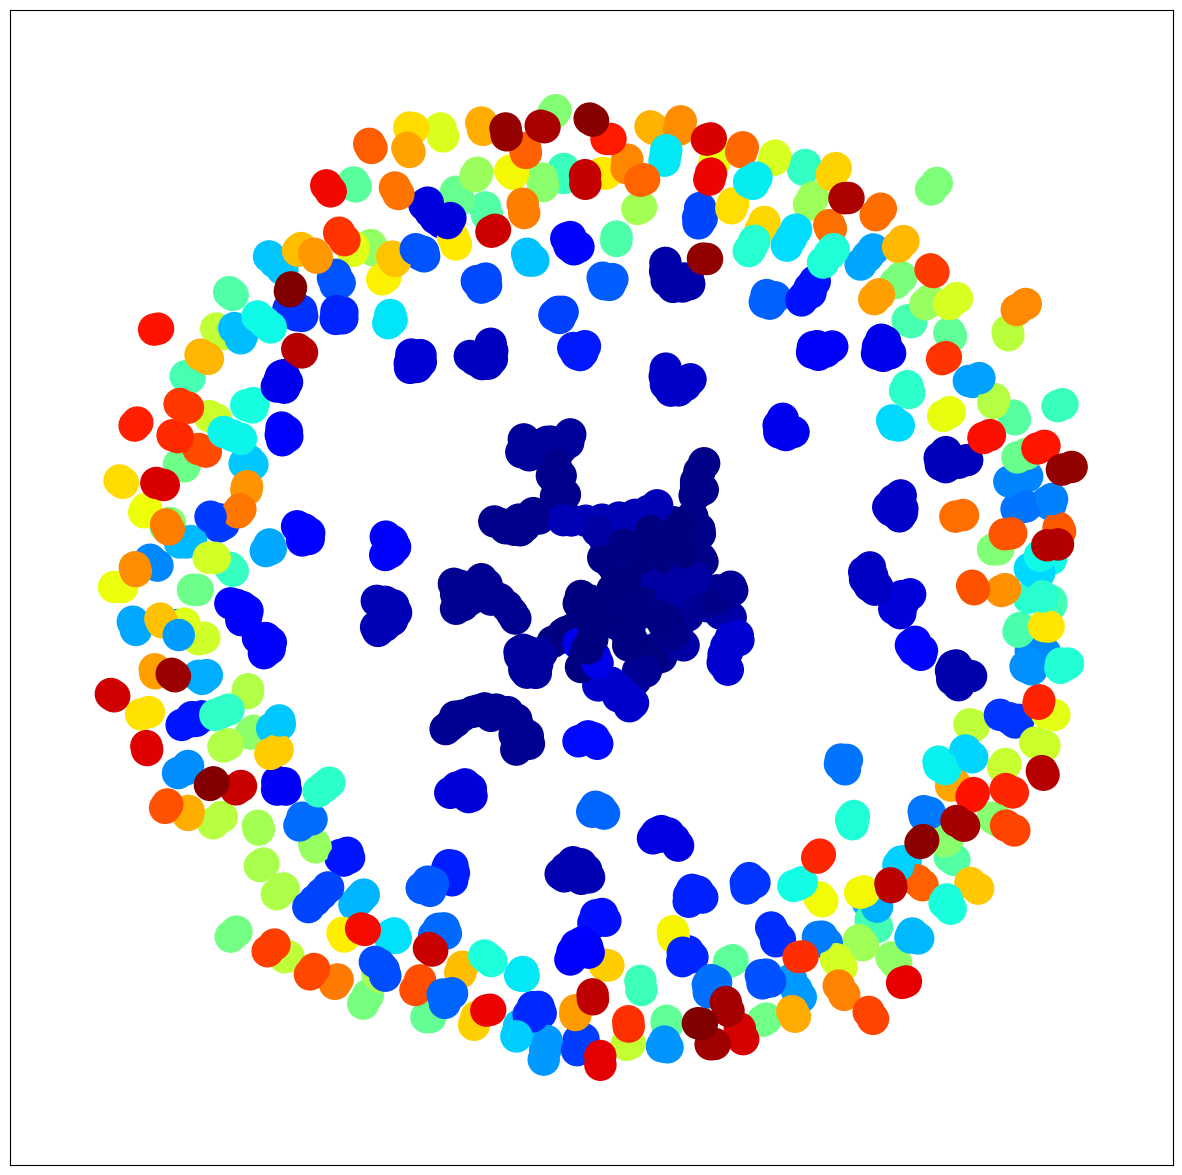

In [55]:
plt.figure(figsize=(15, 15))  # Set the size of the plot

nx.draw_networkx_nodes(cust_date_item_graph, pos_cdi, node_color=node_color, cmap=plt.get_cmap('jet'), node_size=500)
nx.draw_networkx_edges(cust_date_item_graph, pos_cdi, width=1, alpha=0.5)